In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension (grayscale)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Data loaded and preprocessed ✅")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data loaded and preprocessed ✅


In [2]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 60s 68ms/step - accuracy: 0.6716 - loss: 0.9016 - val_accuracy: 0.8545 - val_loss: 0.3972
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.8344 - loss: 0.4598 - val_accuracy: 0.8698 - val_loss: 0.3470
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.8579 - loss: 0.3932 - val_accuracy: 0.8830 - val_loss: 0.3152
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.8705 - loss: 0.3559 - val_accuracy: 0.8887 - val_loss: 0.2922
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - accuracy: 0.8805 - loss: 0.3294 - val_accuracy: 0.8998 - val_loss: 0.2828
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 64ms/step - accuracy: 0.8856 - loss: 0.3125 - val_accuracy: 0.9017 - val_loss: 0.2620
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.8887 - loss: 0.3033 - val_accuracy: 0.8988 - val_loss: 0.2676
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 55s 66ms/step - accuracy: 0.8944 - loss: 0.2887 - 

In [4]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n🧪 Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 5s - 15ms/step - accuracy: 0.9092 - loss: 0.2521

🧪 Test Accuracy: 90.92%


In [5]:
def show_prediction(index):
    image = x_test[index]
    true_label = y_test[index]

    # Model expects a batch, so we add batch dimension
    img_input = np.expand_dims(image, axis=0)

    prediction = model.predict(img_input)
    predicted_label = np.argmax(prediction)

    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}")
    plt.axis('off')
    plt.grid(False)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


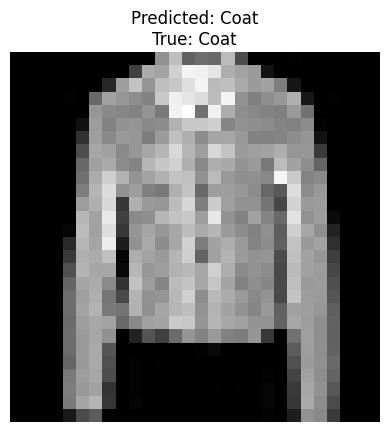

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


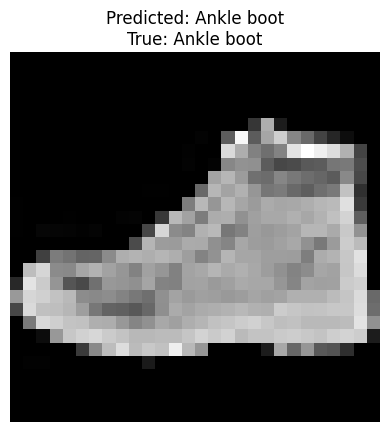

In [6]:
show_prediction(10)
show_prediction(28)

In [7]:
!pip install -q gradio

In [10]:
import gradio as gr

def predict_image(img):
    # Ensure the image is resized to 28x28 and converted to grayscale
    img = img.resize((28, 28)).convert('L')
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    prediction = model.predict(img_array)
    label_index = np.argmax(prediction)
    return class_names[label_index]

# Correct Gradio interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(image_mode='L', sources=["upload"]),
    outputs=gr.Text(label="Predicted Class"),
    title="🧠 Fashion Item Classifier",
    description="Upload a 28x28 grayscale image of clothing (e.g., T-shirt, sneaker) to get a prediction."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://60d015f92053da0dc2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [11]:
model.save("fashion_mnist_model.keras")